# Plot Fig 2 model panels
Code includes:
- panel b: example model fits to  (one subpanel per unit-model)
- panel c: model type performance overview: comparing performance with or without certain model filters for opto, run and eye data

Code excludes:
- panel a: model diagram: this was generated in Adobe Illustrator

The figure panels are manually stored in the paper repo under 'Hmov_L6S_paper/fig_sources/' and then inserted via Adobe Illustrator into Hmov_L6S_paper/figs/fig_02.ai

## TODO
- could save example cells in one figure to reduce manual editing steps and just name it model_example_cells.pdf to reduce need to re-link new cell names
  - wait for ok on general structure
  - could do the same for model population filters

## Setup

In [1]:
run -im djd.main -- --dbname=dj_lisa --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import seaborn as sns

# from djd.hmov_models import _get_data
# from djd.hmov_unit import plot_multi_traces
from djd.glms import get_best_model, plot_model

# Automatically reload modules to get code changes without restarting kernel
# NOTE: Does not work for DJD table modules
%load_ext autoreload
%autoreload 2

### Set plot parameters

In [3]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
# plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })


# Dynamically update plot-specific pars
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0,
    'font.size': 8,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,    
    })

In [4]:
# Make figure directory unless it already exists
fig_dir = os.path.join(os.getcwd(), 'figs')  # os.path.dirname(__file__) gives DJD path
if not os.path.exists(fig_dir):
    print(f"Making figure save directory: {fig_dir}")
    os.makedirs(fig_dir)

## Plot model example units

### Check for good candidates

36
1/36


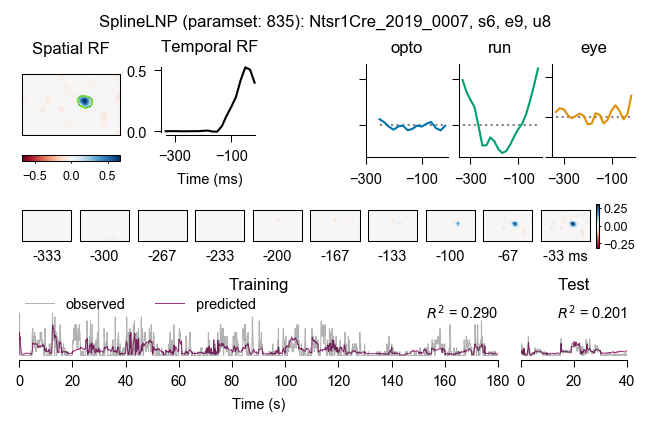

2/36


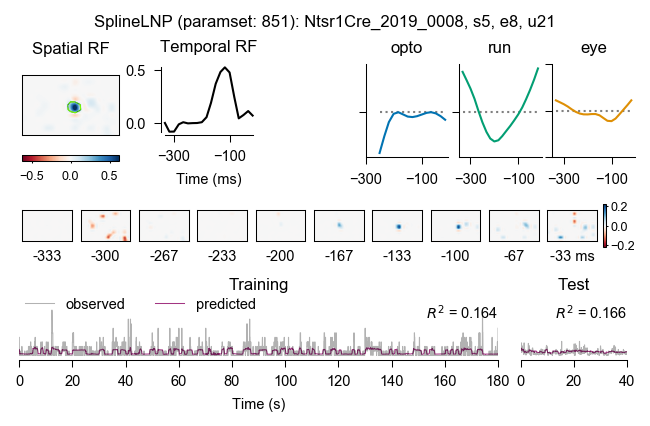

3/36


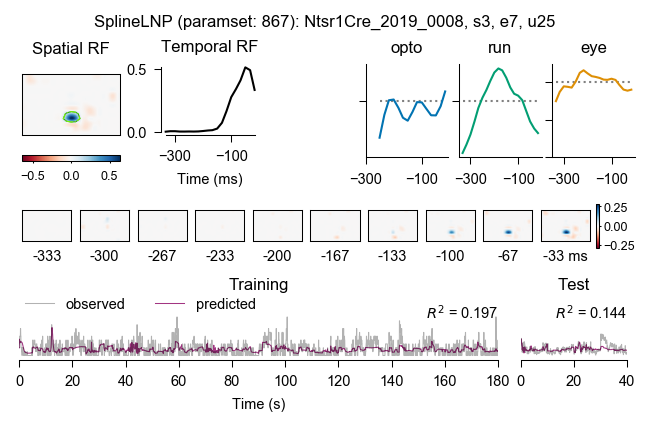

4/36


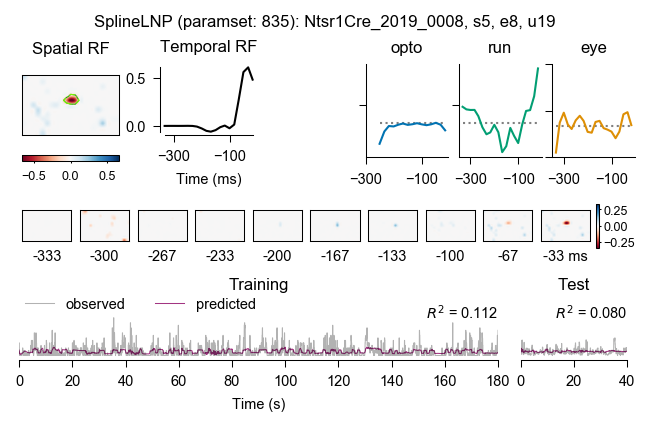

5/36


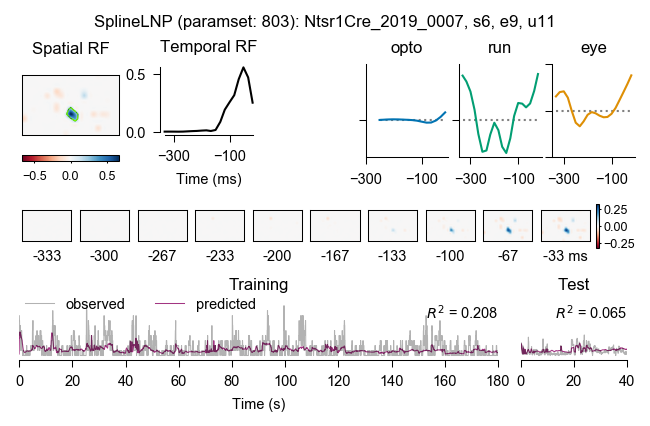

6/36


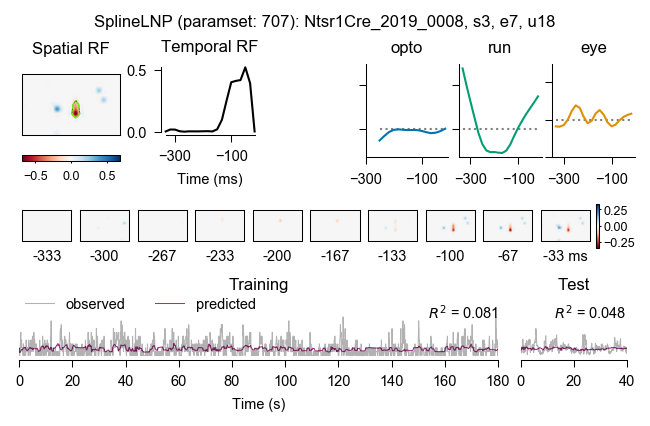

7/36


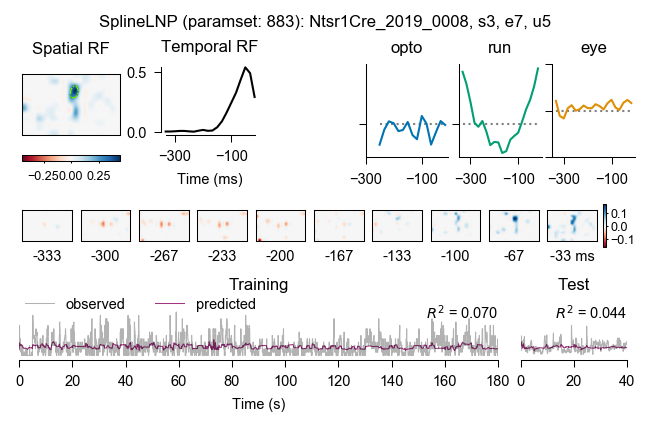

8/36


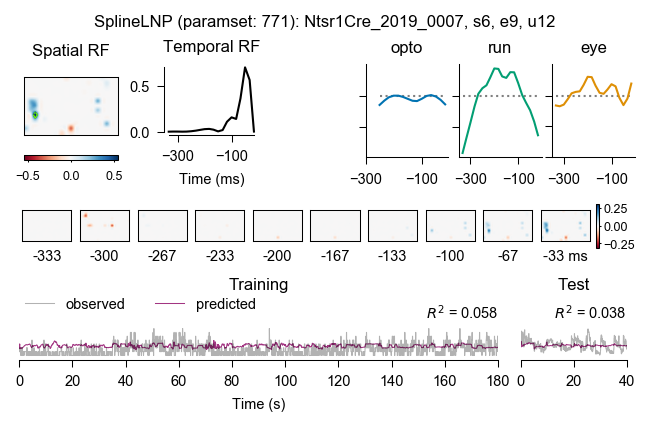

9/36


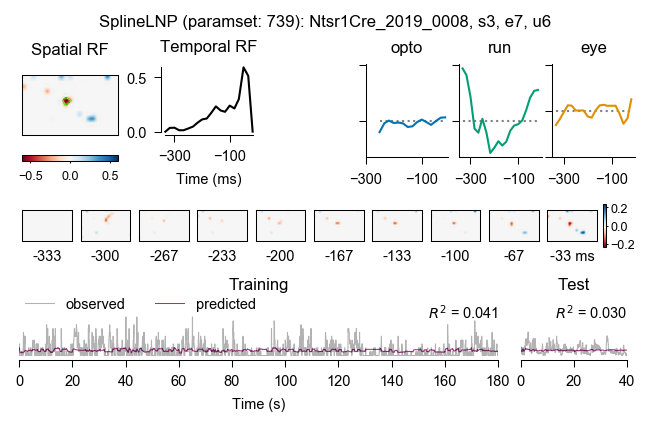

10/36


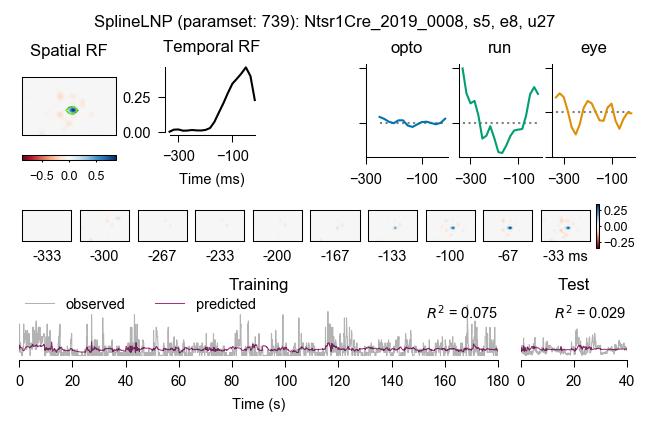

11/36


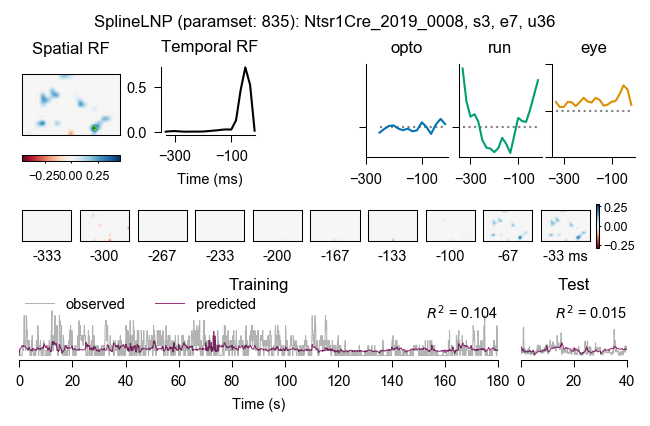

12/36


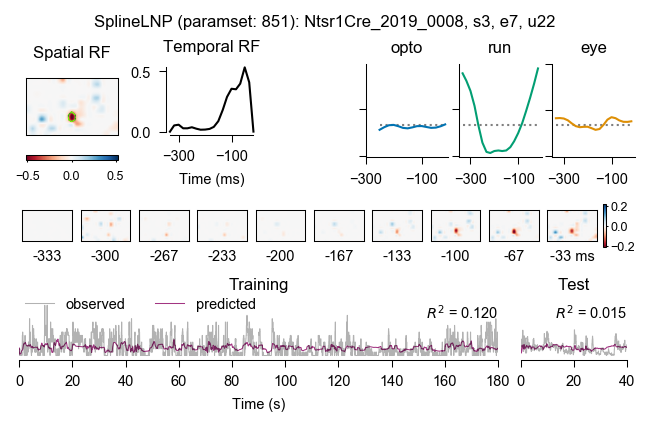

13/36


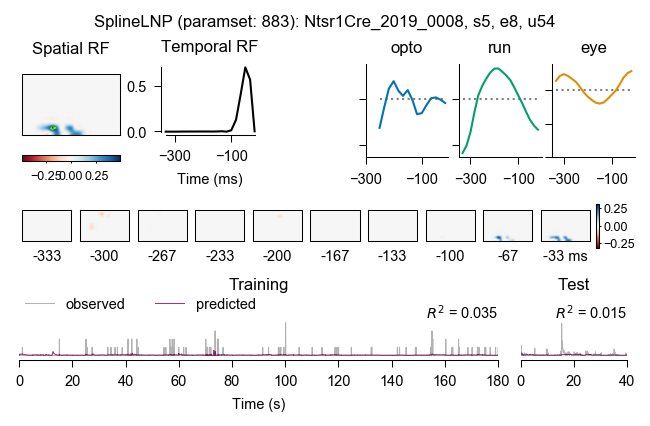

14/36


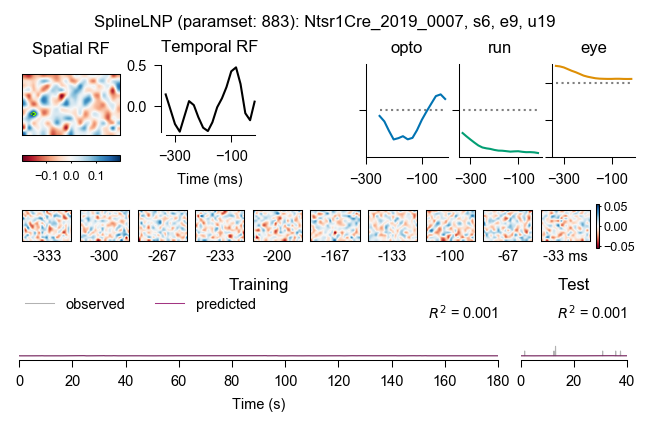

15/36


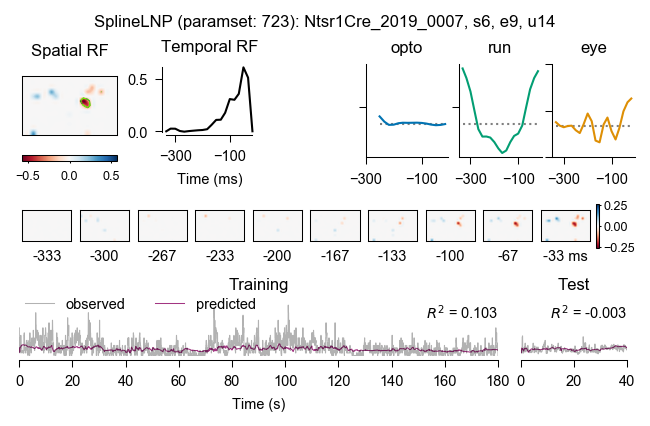

16/36


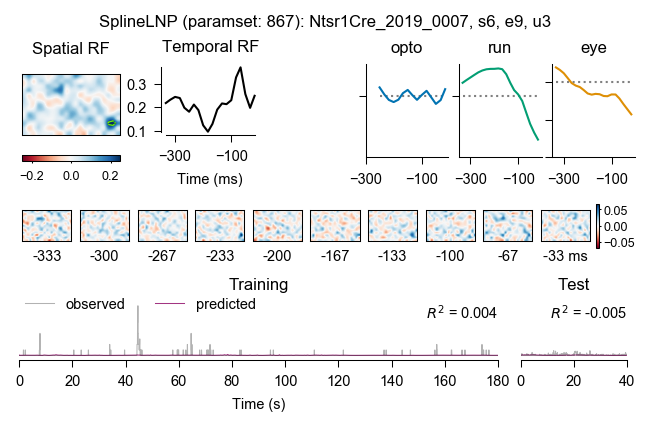

17/36


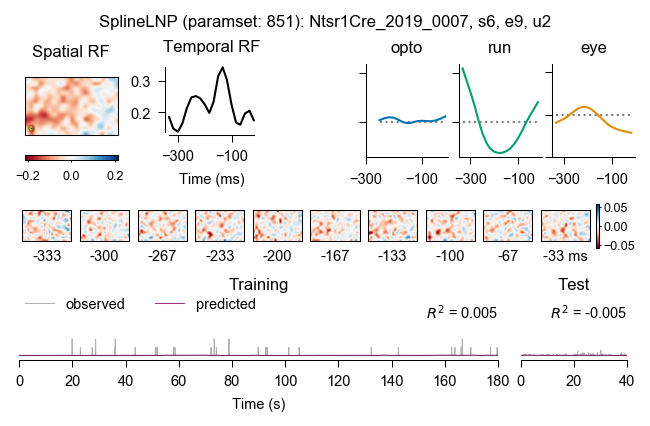

18/36


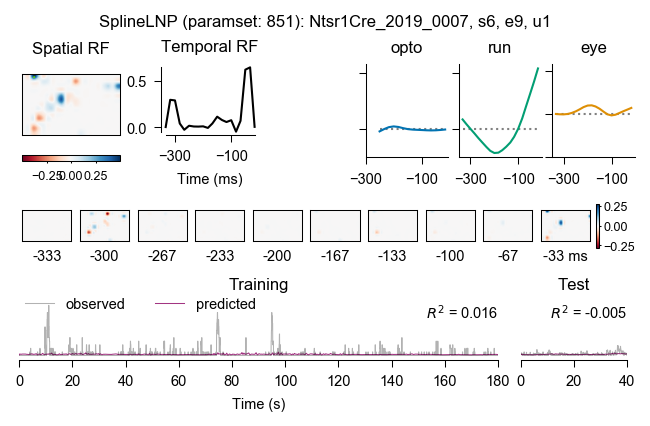

19/36


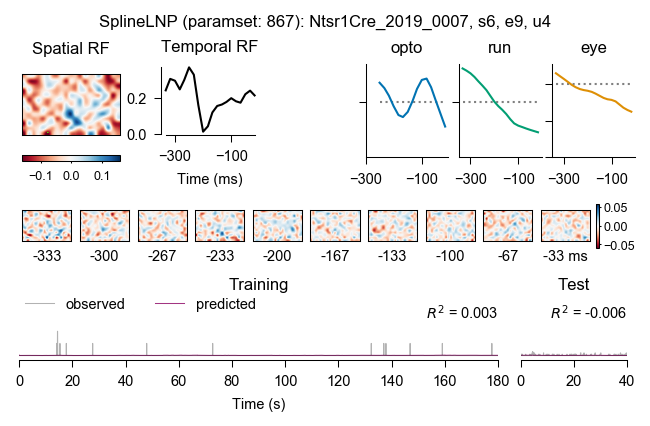

20/36


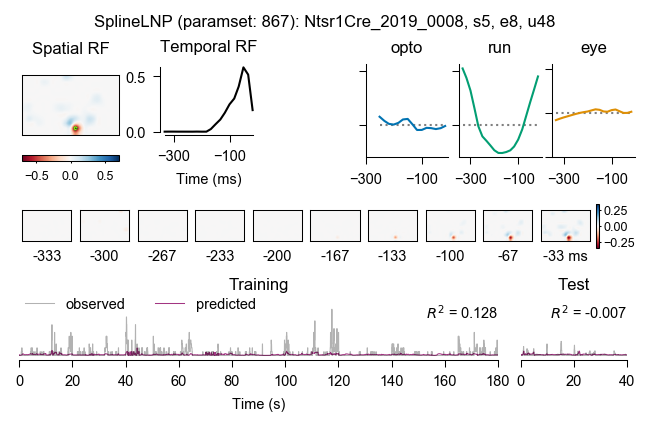

21/36


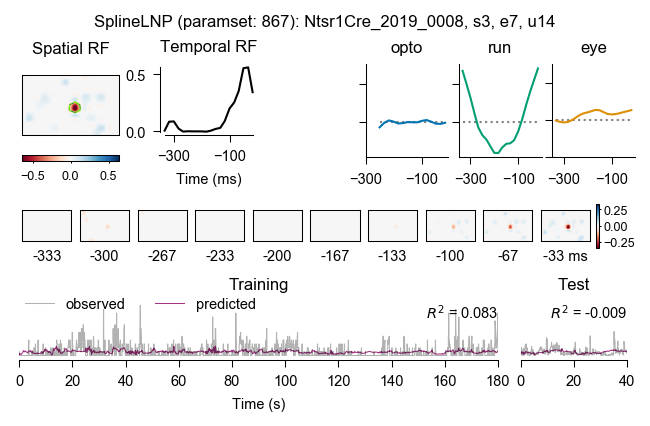

22/36


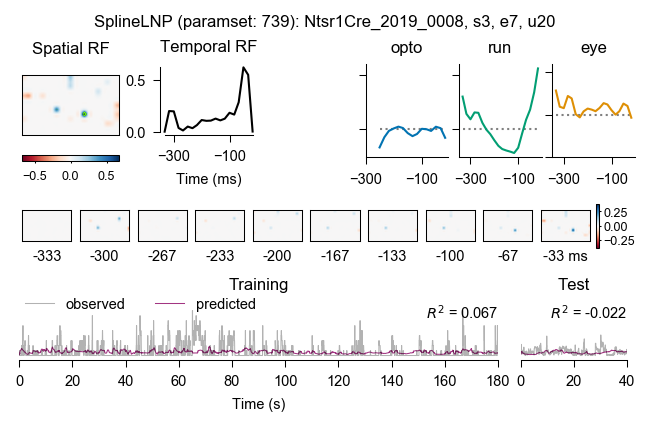

23/36


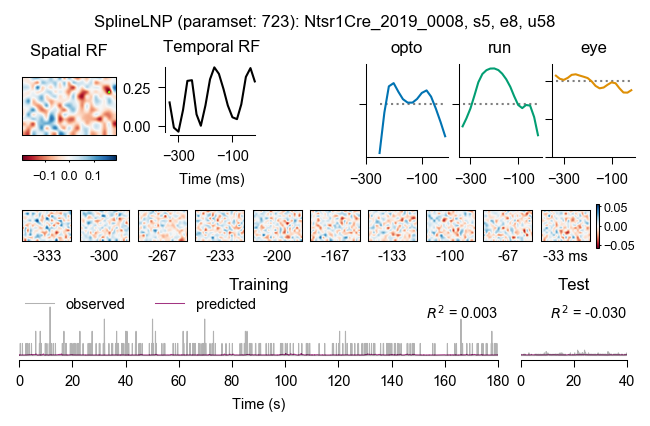

24/36


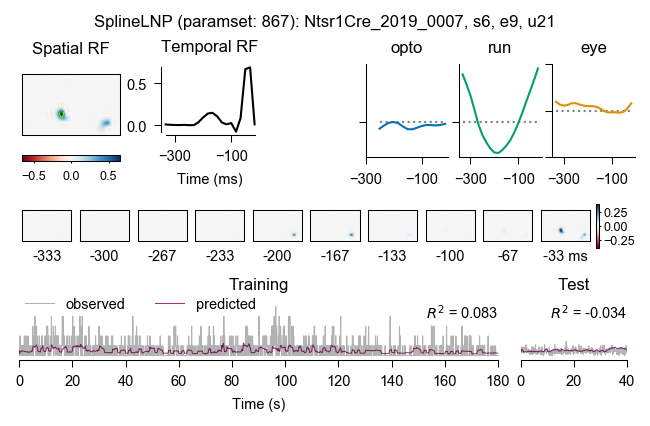

25/36


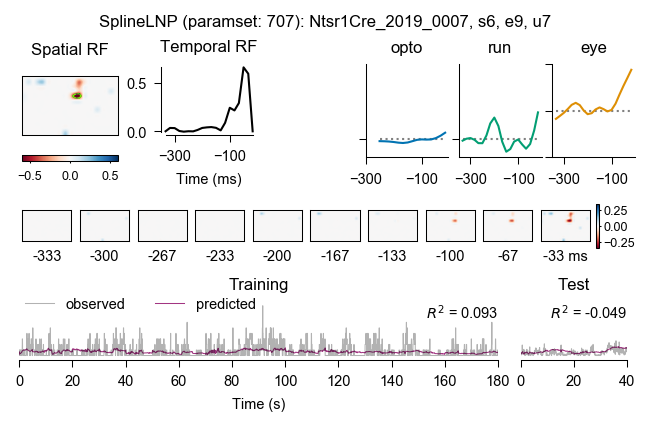

26/36


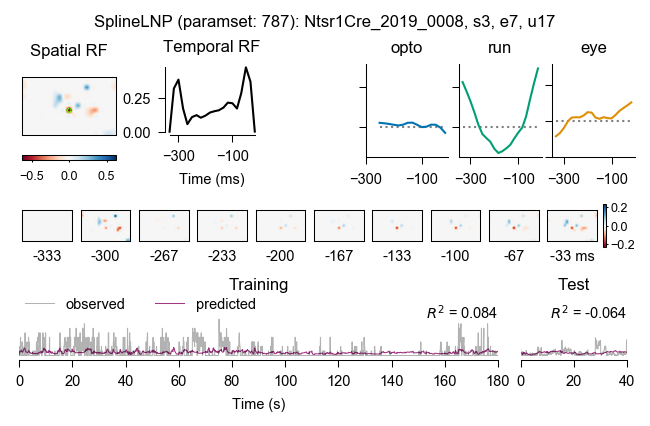

27/36


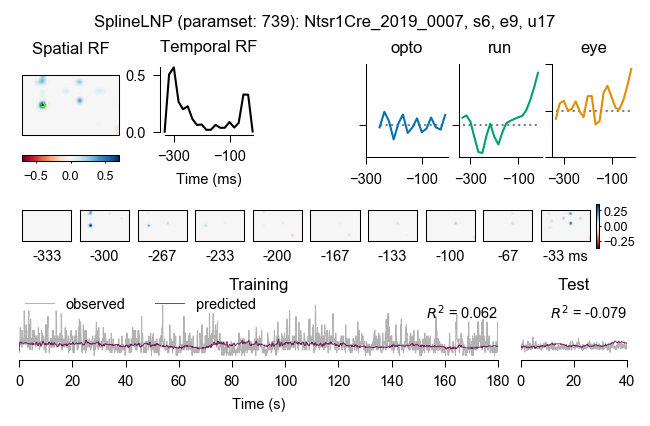

28/36


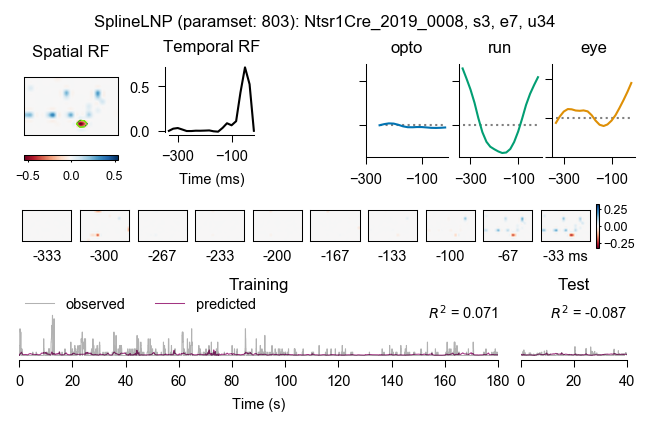

29/36


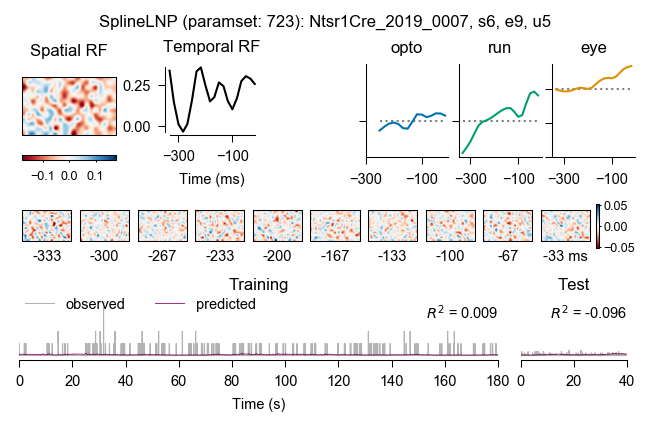

30/36


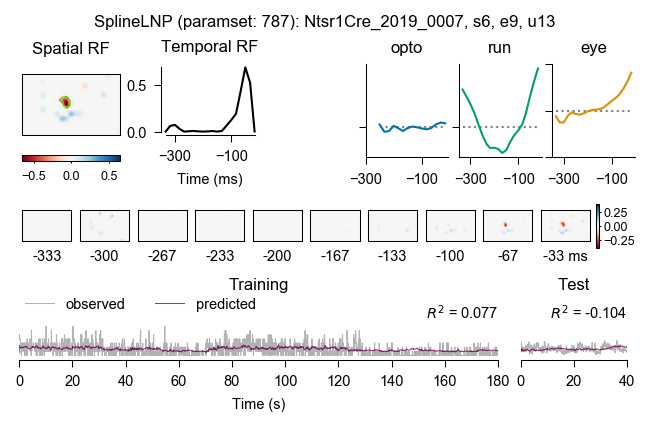

31/36


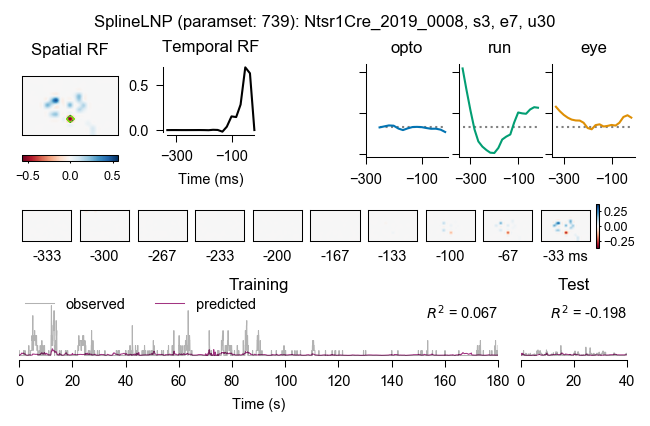

32/36


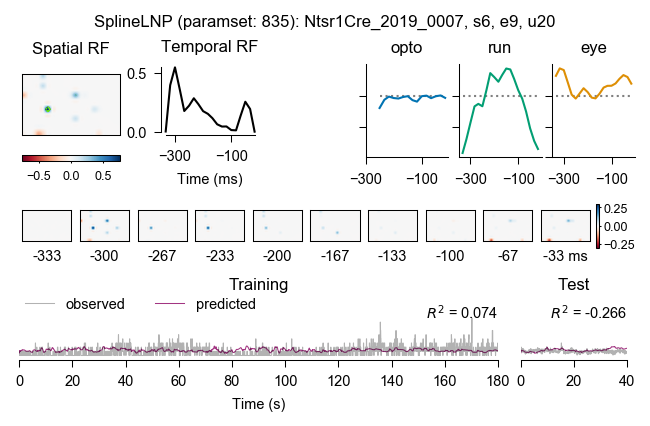

33/36


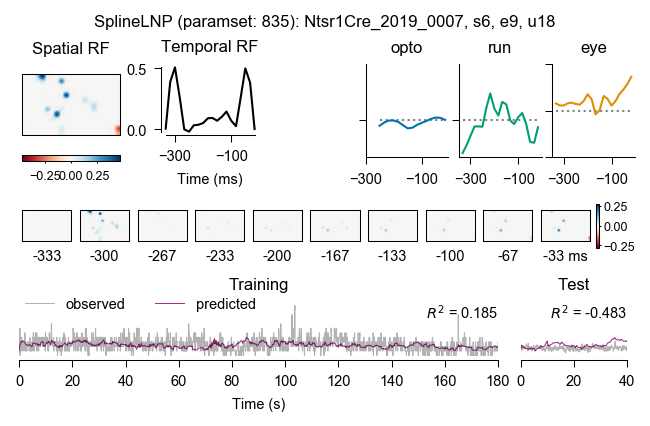

34/36


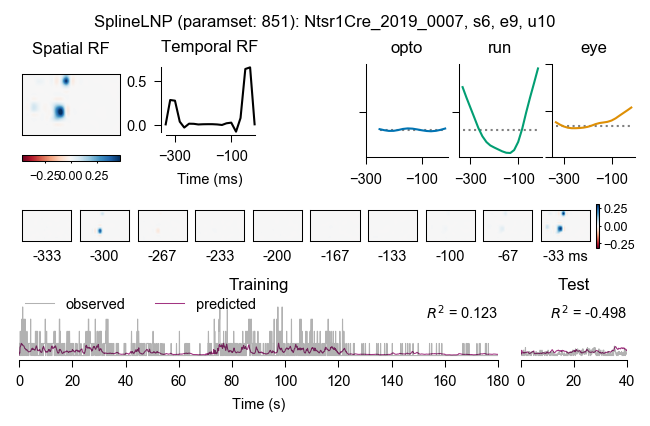

35/36


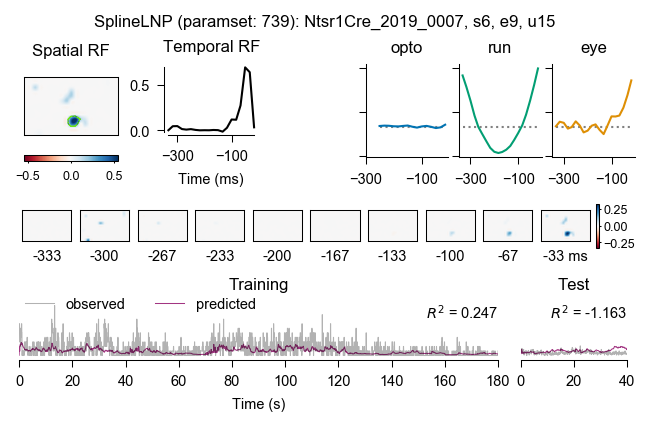

36/36


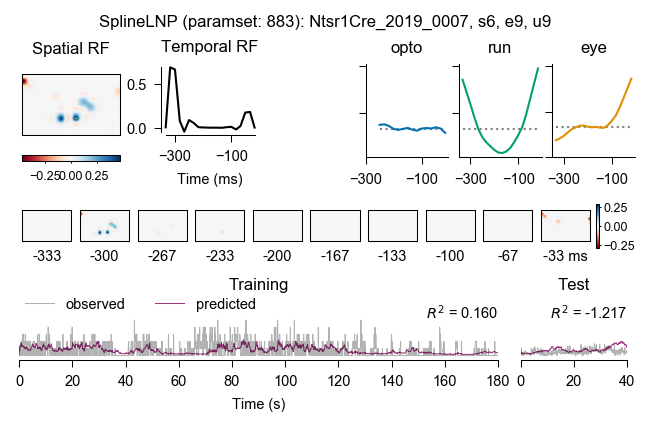

In [10]:
## Loop through all cells sorted by best model
# Get all keys with filter specifications
keys = pd.DataFrame((SplineLNP.Eval() * SplineLNPParams() 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                     ).fetch(dj.key, 'spl_r2_test', as_dict=True))

# Get best model per unit
keys = get_best_model(keys, crit='spl_r2_test', key_only=False, format='df')

# Sort models by r2
keys = keys.sort_values(by=['spl_r2_test'], ascending=False, ignore_index=True)
print(len(keys))

# Plot models
for i, row in keys.head(n=len(keys)).iterrows():
    print(f"{i+1}/{len(keys)}")
    key = row[['m','s','e','u','spl_paramset']].to_dict()
    fig, axs = plot_model(key, title=True)
    plt.show()

In [9]:
# Define example unit key
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 8}
# ukey = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15}

# Units that are opto sensitive and show FR transition w.r.t. locomotion onset (first choice)
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}  # Fig1 example cell
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21}

# Units that are opto sensitive, show different FR in run sit (but no transition at onset) (second choice)
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 5, 'u': 5}
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 5, 'u': 20}
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 5, 'u': 22}


# Lisa's suggestions
# ukey = {'m': 'Ntsr1Cre_2019_0007', 's': 6, 'e': 9,  'u': 7}
# ukey = {'m': 'Ntsr1Cre_2019_0007', 's': 3, 'e': 7,  'u': 5}
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7,  'u': 14}
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7,  'u': 18}
ukey = {'m': 'Ntsr1Cre_2019_0007', 's': 6, 'e': 9,  'u': 11}

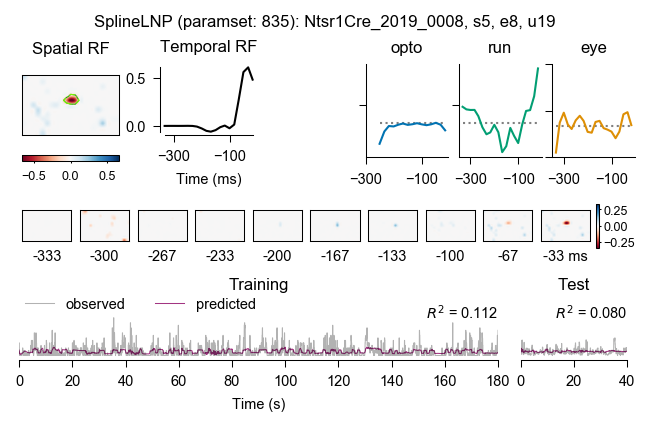

In [19]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}  # Fig 1 unit

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r2_test', key_only=True, format='dict')

fig, axs = plot_model(key, title=True)#, gs=gs[0])

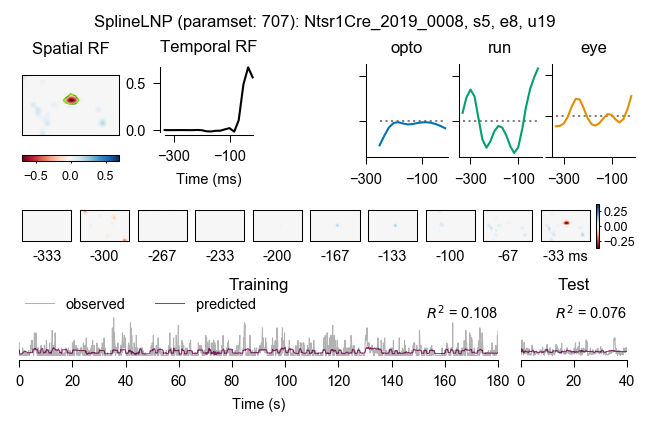

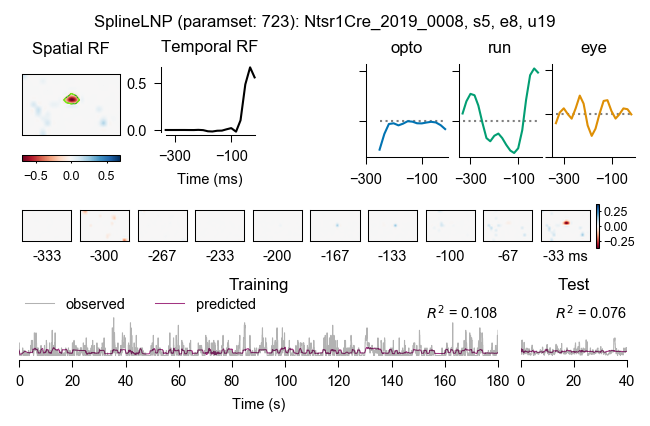

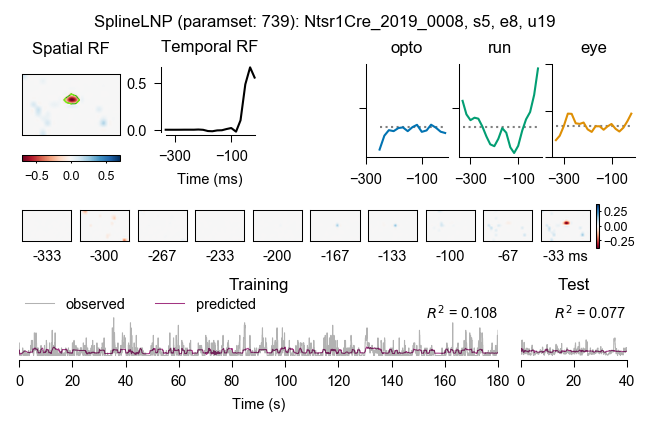

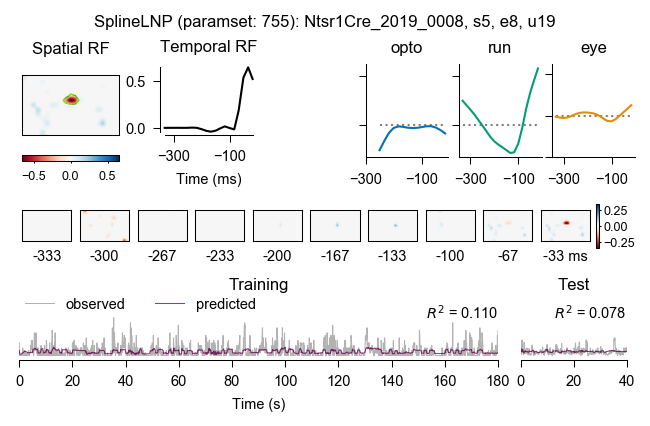

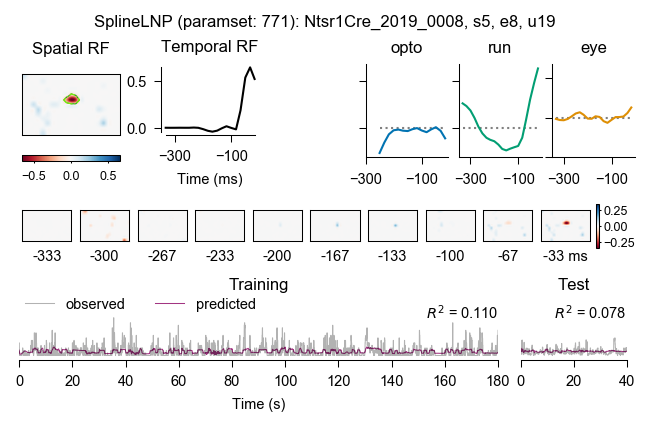

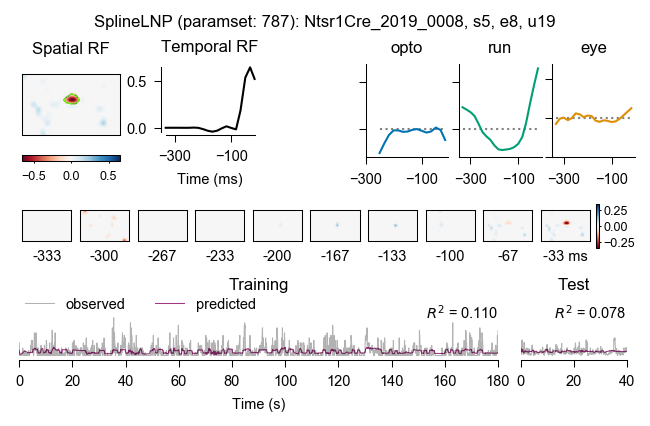

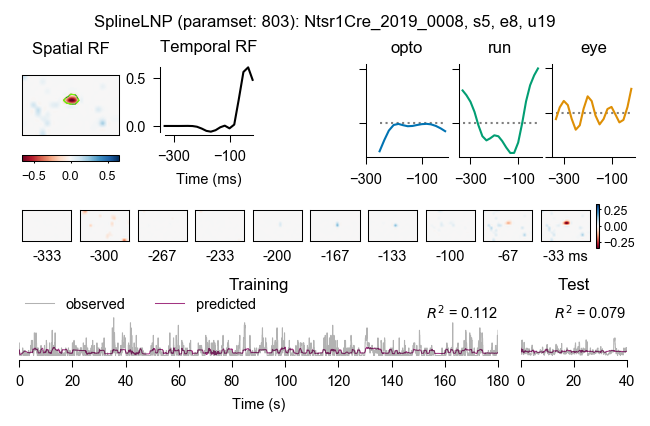

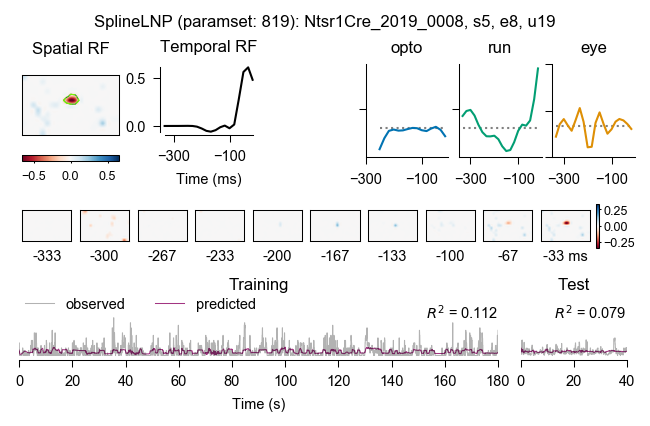

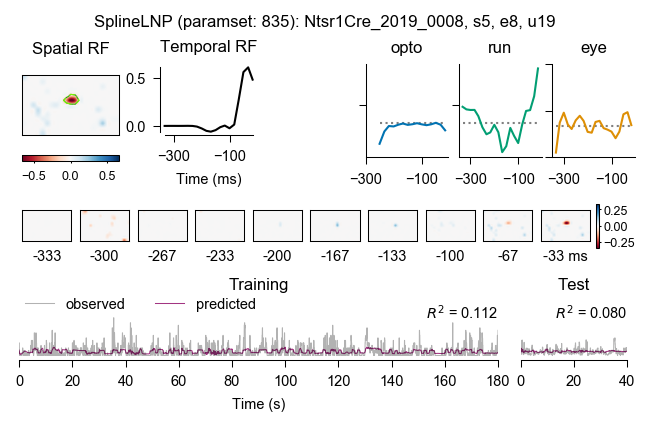

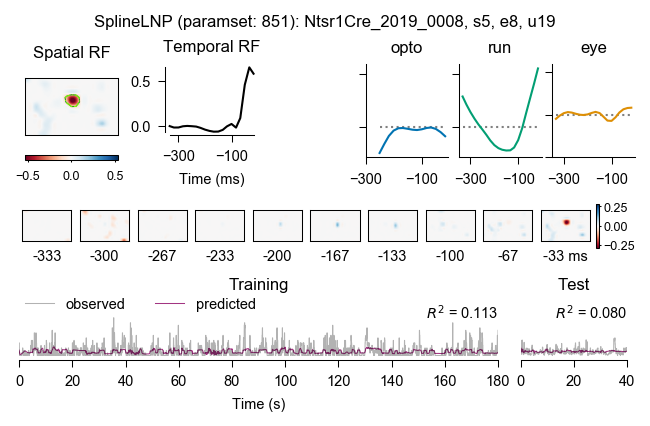

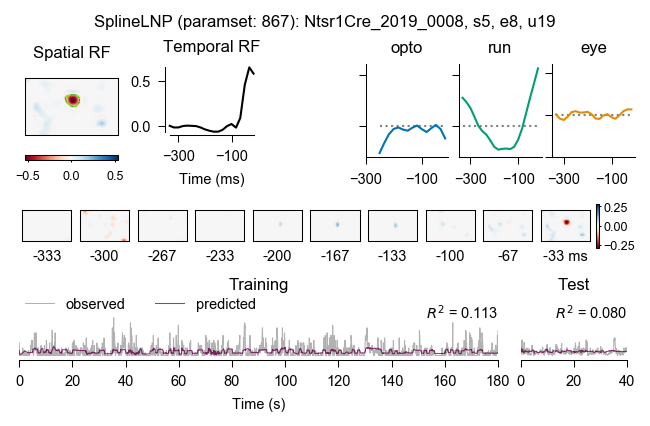

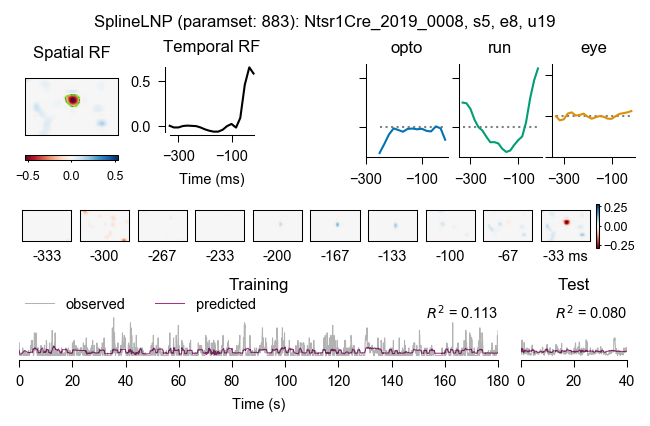

In [18]:
for i, key in modkeys.iterrows():
#     print(key)
    key = key.to_dict()
    fig, axs = plot_model(key, title=True)#, gs=gs[0])

Saving file to ./figs/model_example_03.pdf


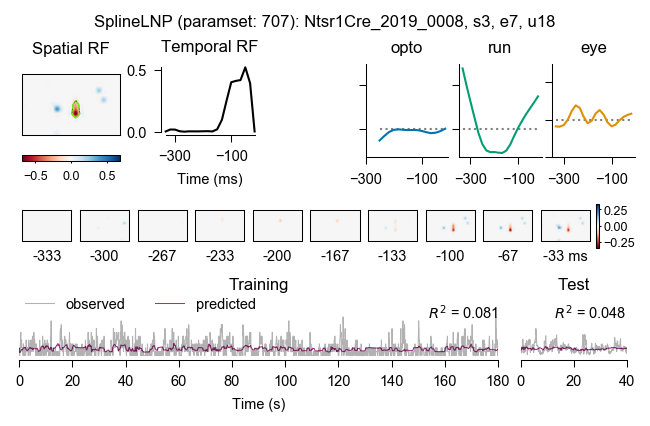

In [5]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7,  'u': 18}


# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                       ).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

# Plot model
fig, axs = plot_model(key, title=True)#, gs=gs[0])

Saving file to ./figs/model_example_03.pdf


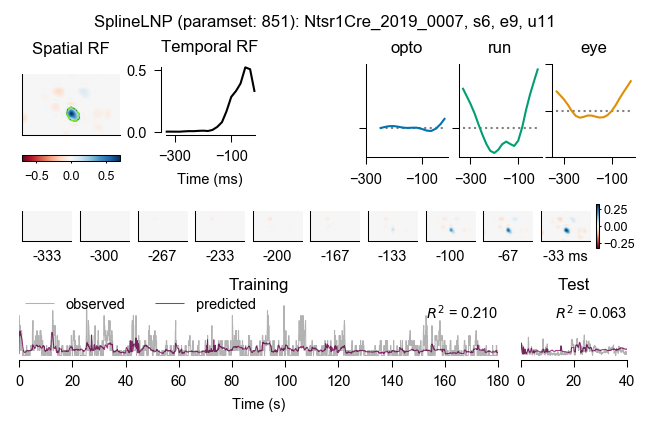

In [12]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0007', 's': 6, 'e': 9,  'u': 11}


# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                       ).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

# Plot model
fig, axs = plot_model(key, title=True)#, gs=gs[0])

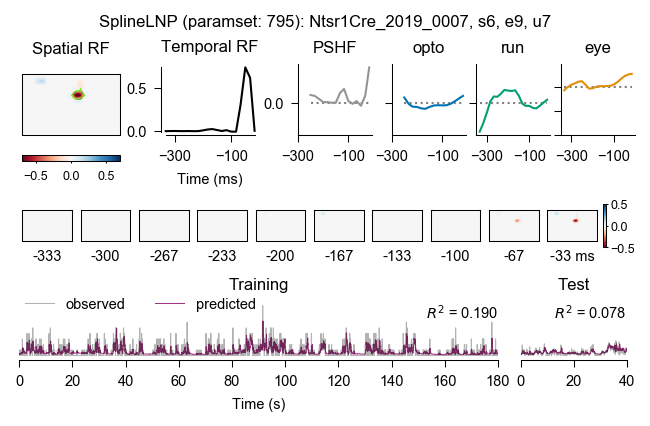

In [14]:
# Define unit key
ukey = {'m':'Ntsr1Cre_2019_0007', 's':6, 'e':9,  'u': 7}

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'True', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                       ).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

fig, axs = plot_model(key, title=True)#, gs=gs[0])

# fig.savefig('foo3.pdf')#, format='pdf')

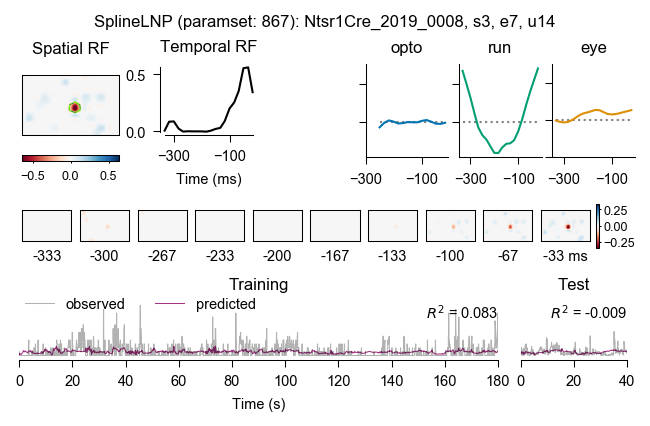

In [13]:
# Define unit ke
ukey = {'m':'Ntsr1Cre_2019_0008', 's':3, 'e':7,  'u':14}

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                       ).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

fig, axs = plot_model(key, title=True)#, gs=gs[0])

# fig.savefig('foo3.pdf')#, format='pdf')

### Plot model example units

Saving file to ./figs/model_example_01.pdf


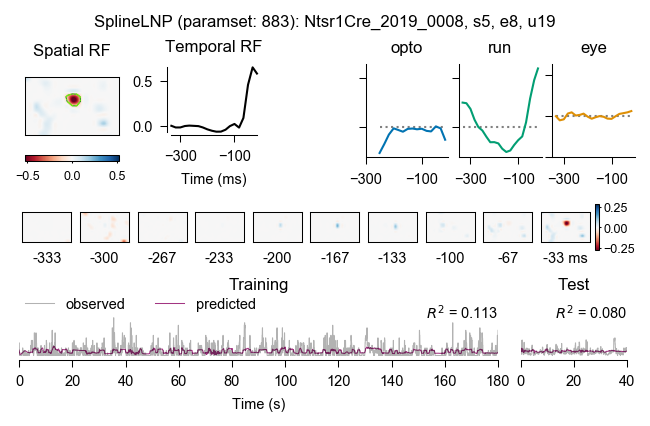

In [33]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}  # Fig 1 unit

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

# Plot model
fig, axs = plot_model(key, title=True)#, gs=gs[0])

# fname = os.path.join('.','figs', f"model_{ukey['m']}_s{ukey['s']}_e{ukey['e']}_u{ukey['u']}.pdf")
fname = os.path.join('.','figs', f"model_example_01.pdf")
print(f'Saving file to {fname}')
fig.savefig(fname)#, format='pdf')

Saving file to ./figs/model_example_02.pdf


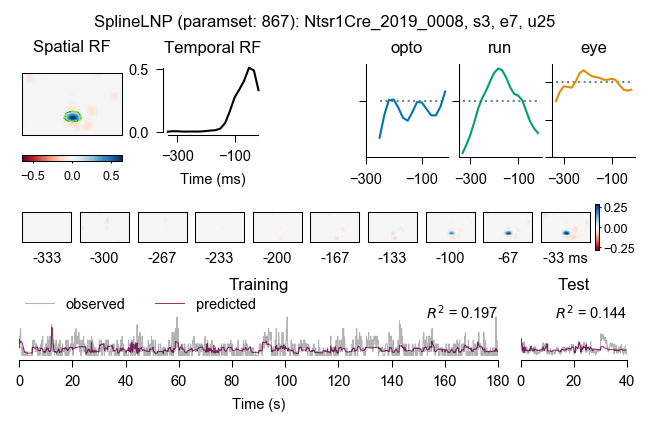

In [34]:
# Define unit key
# Define example unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25}

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

# Plot model
fig, axs = plot_model(key, title=True)#, gs=gs[0])

# fname = os.path.join('.','figs', f"model_{ukey['m']}_s{ukey['s']}_e{ukey['e']}_u{ukey['u']}.pdf")
fname = os.path.join('.','figs', f"model_example_02.pdf")
print(f'Saving file to {fname}')
fig.savefig(fname)#, format='pdf')

Saving file to ./figs/model_example_03.pdf


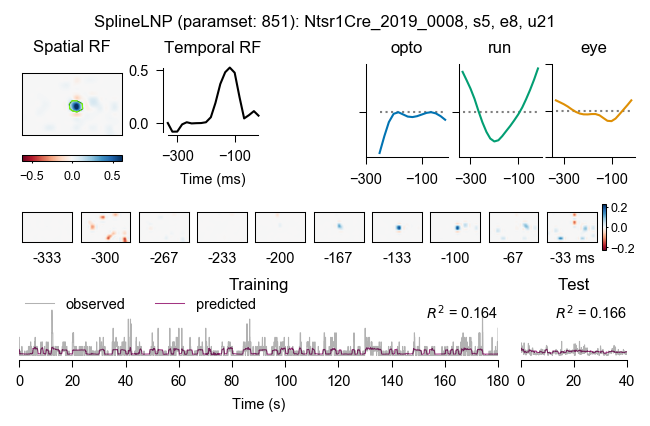

In [35]:
# Define unit key
# Define example unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21}

# Restrict potential model keys for that unit
modkeys = pd.DataFrame((SplineLNP() * SplineLNPParams() & ukey 
                     & {'spl_pshf': 'False', 'spl_opto': 'True', 'spl_run': 'True', 'spl_eye': 'True'}
                       ).fetch(dj.key, as_dict=True))

# Pick best model amongst viable model keys
key = get_best_model(modkeys, crit='spl_r_test', key_only=True, format='dict')

# Plot model
fig, axs = plot_model(key, title=True)#, gs=gs[0])

fname = os.path.join('.','figs', f"model_{ukey['m']}_s{ukey['s']}_e{ukey['e']}_u{ukey['u']}.pdf")
fname = os.path.join('.','figs', f"model_example_03.pdf")
print(f'Saving file to {fname}')
fig.savefig(fname)#, format='pdf')

## Plot model type performance overview

Load model performances for: 
	Blank model
	Opto
	Run
	Eye
	Opto+Run
	Opto+Eye
	Run+Eye
	Full model


/Users/ybauer/code/djd/djd/glms.py:1209: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


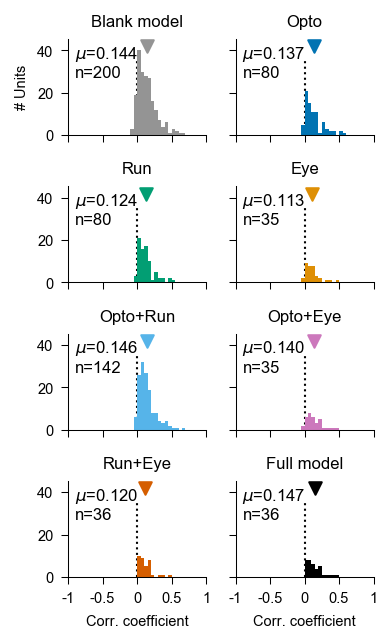

In [7]:
fig, axs = SplineLNP().plot_performance_overview(keys=None, pshf_config=False, eval_metric='r', 
                                                 colors=None, num_cols=2, row_length=2.75, col_length=3.375,
                                                 verbose=True)
fig.savefig('./figs/model_performance_overview.pdf')

## Plot model population filters

### Opto filters

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


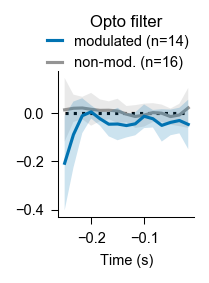

In [7]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation2(thresh_upper=thresh_upper, 
                                                                     thresh_lower=thresh_lower, 
                                                                     keys=keys_crit,
                                                                     mi_kind='omi',
                                                                     zrange=[-.1, .1], 
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))


fig.savefig('./figs/model_population_filters_opto2.pdf')

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14
27.444553805774262 365.1851049868766 27.444553805774262 365.1851049868766
> /Users/ybauer/code/djd/djd/glms.py(1562)plot_filter_split_by_modulation2()
   1560         import pdb
   1561         pdb.set_trace()
-> 1562         axs.set_title(filt_name, y=1+1, va='bottom')
   1563         # fig.suptitle(filt_name)#, y=1.05)
   1564 



ipdb>  c


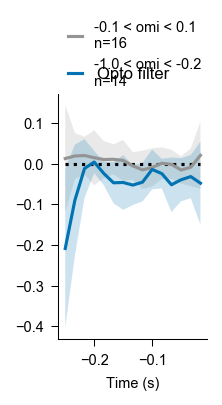

In [4]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation2(thresh_upper=thresh_upper, 
                                                                     thresh_lower=thresh_lower, 
                                                                     keys=keys_crit,
                                                                     mi_kind='omi',
                                                                     zrange=[-.1, .1], 
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 5.5))


fig.savefig('./figs/model_population_filters_opto2.pdf')

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


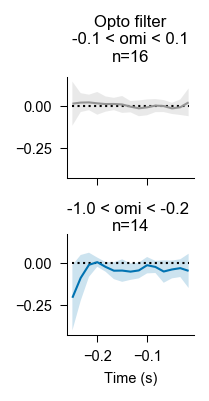

In [5]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(thresh_upper=thresh_upper, 
                                                                     thresh_lower=thresh_lower, 
                                                                     keys=keys_crit,
                                                                     mi_kind='omi',
                                                                     zrange=[-.1, .1], 
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 6.5))


fig.savefig('./figs/model_population_filters_opto.pdf')

### Run filters

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


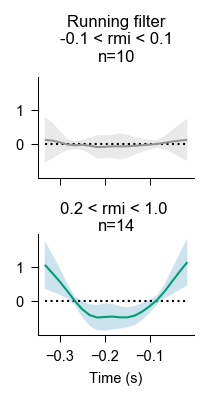

In [7]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(thresh_upper=thresh_upper, 
                                                                     thresh_lower=thresh_lower, 
                                                                     keys=keys_crit,
                                                                     mi_kind='rmi',
                                                                     zrange=[-.1, .1], 
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 6.5))


fig.savefig('./figs/model_population_filters_run2.pdf')